<span style="font-size:110%; text-align:left;"><b><a href="../index.html">2. Plane Waves</a> > <a href="./index.html">1. Fabry Perot Cavity</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>Free Spectral Range</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Daniel Töyrä </span>

<img src="fsr.svg" style="width: 800px" align="center"/>

# Table of Contents
 <p><div class="lev1"><a href="#1.-Introduction">1. Introduction</a></div><div class="lev1"><a href="#2.-Free-Spectral-Range">2. Free Spectral Range</a></div><div class="lev2"><a href="#2.1.-Optical-layout-and-FINESSE-model">2.1. Optical layout and FINESSE model</a></div><div class="lev2"><a href="#2.2.-FINESSE-example">2.2. FINESSE example</a></div><div class="lev1"><a href="#3.-Tasks">3. Tasks</a></div><div class="lev2"><a href="#3.1.-How-does-the-FSR-depend-on-the-macroscopic-cavity-length">3.1. How does the FSR depend on the macroscopic cavity length</a></div><div class="lev1"><a href="#4.-Tasks-with-answers">4. Tasks with answers</a></div><div class="lev2"><a href="#4.1.-How-does-the-FSR-depend-on-the-macroscopic-cavity-length">4.1. How does the FSR depend on the macroscopic cavity length</a></div><div class="lev1"><a href="#5.-Summary">5. Summary</a></div>

# 1. Introduction

The distance in frequency between two resonance peaks is called the *Free Spectral Range* (FSR) of a cavity. The FSR is often an important property of a cavity since it tells how well separated the resonance peaks are. The FSR is related to the width of the peak through the cavity Finesse, which are two concepts that will be handled in the upcoming two notebooks.

** Recommended notebooks before you start:**

We recommend that you have looked through the notebook **01_Resonance.ipynb** that you find in the folder [01_Fabry_Perot_cavity](../01_Fabry_Perot_cavity/index.html) before you start this one, or that you have basic experience of IPython/Jupyter Notebooks, PyKat, Finesse, and resonance in a Fabry-Perot cavity. The link above only works if you started IPython/Jupyter Notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

**After this session you will... **

* be able to tell which cavity property the FSR depends on
* be able to show how the relationship between this property and the FSR looks like
* have seen how to use `scipy.optimize.scalar()` for finding a local maximum/minimum.

# 2. Free Spectral Range

First we import the PyKat and other Python packages that we need:

In [2]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.4           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## 2.1. Optical layout and FINESSE model

The setup we use is the same as we used in the two previous notebook. It consists of an input laser, and two mirror forming a cavity as we see below. To be able to measure the laser power we also need photo diodes, which in FINESSE are able to measure the power without interfering with the beam.

<img src="fabry-perot.svg" style="width: 500px;"/>

Now we crate our FINESSE model of the optical setup:

In [3]:
basekat=finesse.kat() # initialising Finesse
basekat.verbose = False
basecode = """
l laser 1 0 n0   # Laser (Power = 1 W, wavelength offset = 0)
s s1 1 n0 nc1    # Space (Length = 1 m)

## The cavity ##
m m1 0.7 0.3 0 nc1 nc2  # Mirror  (R = 0.7, T = 0.3, phi = 0)
s sL 4000 nc2 nc3       # Space (Length = 4 km)
m m2 0.8 0.2 0 nc3 nc4  # Mirror  (R = 0.8, T = 0.2, phi = 0)
"""
basekat.parseKatCode(basecode) # Parsing the FINESSE-code

## 2.2. FINESSE example

In this example we will show that the FSR changes with changing macroscopic cavity length. In each run we sweep the frequency offset of the laser. We will do three runs, each with a different macroscopic cavity length.

First we add detectors and simulation instructions:

In [34]:
kat1 = basekat.deepcopy()
code = '''
## Detectors ##
# Photo diodes measuring DC-power
pd refl nc1        # Reflected 
pd circ nc2        # Circulating
pd tran nc4        # Transmitted

## Simulation instructions ##
xaxis laser f lin -5k 90k 1000   # Sweeping the laser frequency
yaxis abs                        # Returns magnitude of detector outputs
'''
# Parsing the FINESSE code
kat1.parseCommands(code)

Now, we run the simulation three times, but we change the macroscopic cavity length between each run. We store the outputs in `out1a`, `out1b`, and `out1c`.

In [35]:
# 1st run, original cavity length of 4 km.
out1a = kat1.run()

# 2nd run, cavity length of 6 km.
kat1.sL.L = 6000
out1b = kat1.run()

# 3rd run, cavity length of 8 km.
kat1.sL.L = 8000
out1c = kat1.run()

Finally, we plot the results:

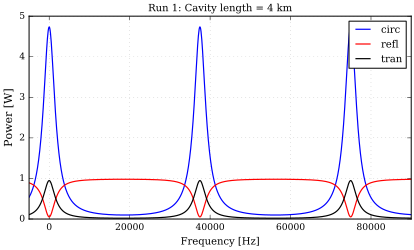

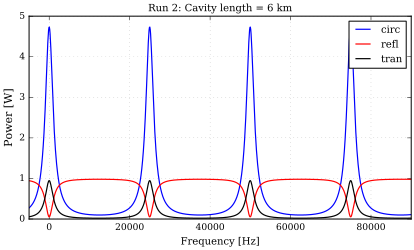

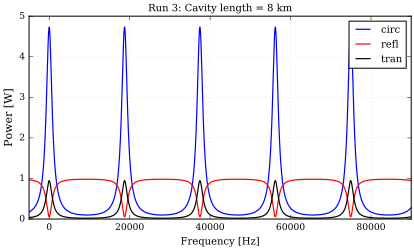

In [36]:
# Run 1
fig1a = out1a.plot(xlabel='Frequency [Hz]', 
                   ylabel='Power [W]', 
                   title='Run 1: Cavity length = 4 km',
                   loc=1)
# Run 2
fig1b = out1b.plot(xlabel='Frequency [Hz]', 
                   ylabel='Power [W]', 
                   title='Run 2: Cavity length = 6 km', 
                   loc=1)
# Run 3
fig1c = out1c.plot(xlabel='Frequency [Hz]', 
                   ylabel='Power [W]', 
                   title='Run 3: Cavity length = 8 km', 
                   loc = 1)

We can clearly see that the peaks are closer and closer together the more we increase the cavity length. How the relationship between the FSR and the macroscopic cavity length looks like will you investigate in task 3.1. below.

# 3. Tasks

## 3.1. How does the FSR depend on the macroscopic cavity length

Investigate how the FSR depends on the macroscopic cavity length by testing a couple of different lengths. Find the FSR of each run either manually by "zooming" in the peaks with the FINESSE command `xaxis`, or by making use of the  `scipy.optimize` library, where I would suggest `scipy.optimize.minimize_scalar()` (see hint below). Try to also work out an analytical expression for the FSR of a cavity, and compare with your simulated result.

**Hint on using ```scipy.optimize.minimize_scalar()``` : **

`scipy.optimize.minimize_scalar()` requires as its first argument a name of a function to be minimised, so first define a function. For example like this (not exactly in this form, you need to do a small change for your task):
```python
def my_function(x):
        kat.laser.f = x
        out = kat.run()
        return out['tran']
```

In the Finesse code you can replace the `xaxis` command with `noxaxis` so that a call to `kat.run()` returns only one value, which is necessary for `minimize_scalar()` to work. 

Then you can call the scipy function to find the minimum of ` my_function()` as:

```python
import scipy.optimize as opt
opt.minimize_scalar(my_function, ...)
```

**Answer:**

# 4. Tasks with answers

## 4.1. How does the FSR depend on the macroscopic cavity length

Investigate how the FSR depends on the macroscopic cavity length by testing a couple of different lengths. Find the FSR of each run either manually by "zooming" in the peaks with the FINESSE command `xaxis`, or by making use of the  `scipy.optimize` library, where I would suggest `scipy.optimize.minimize_scalar()` (see hint below). Try to also work out an analytical expression for the FSR of a cavity, and compare with your simulated result.

**Hint on using ```scipy.optimize.minimize_scalar()``` : **

`scipy.optimize.minimize_scalar()` requires as its first argument a name of a function to be minimised, so first define a function. For example like this (not exactly in this form, you need to do a small change for your task):
```python
def my_function(x):
        kat.laser.f = x
        out = kat.run()
        return out['tran']
```

In the Finesse code you can replace the `xaxis` command with `noxaxis` so that a call to `kat.run()` returns only one value, which is necessary for `minimize_scalar()` to work. 

Then you can call the scipy function to find the minimum of ` my_function()` as:

```python
import scipy.optimize as opt
opt.minimize_scalar(my_function, ...)
```

**Answer:**

We start by copying `basekat`, adding a photo diode detecting transmitted power, and adding simulation instructions. Note that we use the command `noxaxis`, which means that we just runs the current setup, i.e., only one data point. 

In [37]:
kat2 = basekat.deepcopy()  # Copying basekat

# Adding detectors and simulation instructions
code = '''
## Detectors ##
pd tran nc4         # Measuringn transmitted power

## Simulation instructions ##
noxaxis             # Changing nothing, just running current setup.
yaxis abs           # Returns absolute value of the detector output
'''

# Parsing the FINESSE code
kat2.parseCommands(code)

Now we write the function `find_fsr()` that has our `kat`-object as the only input, and it returns the FSR of the cavity as long as we have a detector measuring the transmitted power, and no other detectors. As you see below, the function `find_fsr()` has two inner functions as well: one that finds maximums, and one that finds minimums. Note that the only difference is the minus sign in the output for the max-finder. `find_fsr` operates in three steps:

* Finds the first maximum by using `minimize_scalar()`, and stores it
* Offsetting the starting guess so that we are in the downhill slope, and from there we call `minimize_scalar()` to find the minimum in between the two maximums.
* Having the minimum, we have a good starting guess of the second maximum, as the minimum is located in between the two peaks. Finds the second peak by again calling `minimize_scalar()`.

In [41]:
import scipy.optimize as op

def find_fsr(kat):
# Function for finding FSR of a cavity
    
    # Finding the laser component of the kat-object
    laser = kat.getAll(pykat.components.laser)[0]
    
    def find_max(f, df):
    # Function that is minimised at the frequency f + df 
    # that gives maximum transmitted power. Since Brent's 
    # method will search around f = 0, thus df acts as the 
    # starting guess.

        laser.f = f + df        # Setting new laser frequency
        out_max = kat.run()     # Running
        return -out_max.y[0,0]  # Output

    def find_min(f, df):
    # Function that is minimised at the frequency f + df 
    # that gives minimum transmitted power. Since Brent's 
    # method will search around f = 0, thus df acts as the 
    # starting guess.
    
        laser.f = f + df       # Setting new laser frequency
        out_min = kat.run()    # Running
        return out_min.y[0,0]  # Output

    # Step 1: Finding the first peak
    # -----------------------------
    offset = 0           # Start guess, df = 0
    xtol = 1.0e-6
    opts = {'xtol': xtol, 'maxiter': 500}
    # Calling minimize_scalar with Brent's method to 
    # find minimum of find_max().
    sol_1 = op.minimize_scalar(find_max, 
                               args=(offset), 
                               method='brent', 
                               options=opts)
    
    max1 = sol_1.x   # Storing position
    
    # Step 2: Estimating minimum between peaks
    # ------------------------------
    xtol = 1.0e-1     # This step is a rough estimation, using higher tolerance
    opts = {'xtol': xtol, 'maxiter': 500}
    offset = max1+10*xtol      # Start guess, a bit away from max1
    # Calling minimize_scalar with Brent's method to 
    # find minimum of find_min().
    sol_2 = op.minimize_scalar(find_min, 
                               args=(offset), 
                               method='brent', 
                               options=opts)
    min1 = sol_2.x + offset

    # Step 3: Finding second peak
    # ------------------------------
    xtol = 1.0e-6   # Lowering tolerance again
    opts = {'xtol': xtol, 'maxiter': 500}
    offset = 2*min1 - max1   # Starting guess based on previous steps
    
    # Calling minimize_scalar with Brent's method to 
    # find minimum of find_max().
    sol_3 = op.minimize_scalar(find_max, 
                               args=(offset), 
                               method='brent', 
                               options=opts)
    
    max2 = sol_3.x + offset    # Storing peak position
    
    fsr = np.abs(max2-max1)    # Computing the FSR
    # Prints the FSR
    print('L = {0:.1f} m,  FSR = {1:.2f} Hz'
          .format(kat.sL.L.value, fsr))
    
    return fsr

Now we test our function for 5 different cavity lengths.

In [42]:
lengths = np.logspace(0,4,5)   # Lenghts, log-spaced between 1 and 10 000.
fsr = []
for L in lengths: 
    kat2.sL.L = L              # Setting cavity length
    fsr.append(find_fsr(kat2)) # Finding FSR and storing in list fsr

L = 1.0 m,  FSR = 149896229.00 Hz
L = 10.0 m,  FSR = 14989622.90 Hz
L = 100.0 m,  FSR = 1498962.29 Hz
L = 1000.0 m,  FSR = 149896.23 Hz
L = 10000.0 m,  FSR = 14989.62 Hz


Plotting the results:

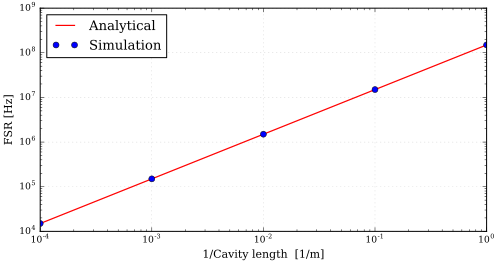

In [43]:
# Analytical FSR for comparison
c = 299792458.0      # Speed of light
FSR = c/(2*lengths)  

# Plotting
fig2 = plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.plot(1/lengths,FSR,'r-',label='Analytical')
ax.plot(1/lengths,fsr,'bo',label='Simulation')
ax.set_xlabel('1/Cavity length  [1/m]')
ax.set_ylabel('FSR [Hz]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 2)
plt.show(fig2)

As we see in the figure, the FSR is inversely proportional to the cavity length. We can also see that the simulated points perfectly agrees with the analytical expression $\mathrm{FSR}=c/(2L)$, where $c$ is the speed of light, and $L$ is the cavity length.

To derive this analytical expression we used the resonance condition $2kL = 2n\pi$, where n is an arbitrary integer, and $k = 2\pi/\lambda = 2\pi f/c$ is the wavenumber. Thus, we get 

\begin{align}
f = \frac{n c}{2 L}, 
\end{align}

which determines all frequencies that gives resonance peaks. To obtain the FSR we need to compute the frequency distance between two adjacent peaks. Since they are linearly spaced, we can for simplicity chose the frequency distance between the peaks for n=0 and n=1, which results in an FSR of

\begin{align}
\mathrm{FSR} = \frac{c}{2L}.
\end{align}

Writing this much code for computing something that has such a simple analytical solution is a bit of an over kill. But it is good Python and optimisation practice. Also, in FINESSE, there are two quicker ways of finding out the FSR of a cavity. You can either use the cavity parameter detector (keyword `cp`), or the command `trace 2`. You can read about these commands in the online syntax reference [3] and in the FINESSE manual [2]. However, both commands currently demands a stable cavity and that you use a Gaussian beam in comparison to the plane waves we are currently using. So we will wait with explaining those commands until chapter 3.

# 5. Summary

In this session we have ...
* seen that the frequency spacing between the resonance peaks depends on the macroscopic cavity length
* investigated the relation between the FSR and the macroscopic cavity length
* derived a simple analytical expression for the FSR

In the next session [Linewidth](04_Linewidth.html) we will go through what is meant by the linewidth of a cavity.